In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [106]:
data = pd.read_csv('Lagged VIX Data.csv',index_col="Date")
data.index = pd.to_datetime(data.index)
data_clean = data
data_clean.fillna(data_clean.mean(), inplace=True)

In [107]:
data_clean

,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,GDP,Initial Claims,...,OIL Volume,VIX,Next Month VIX,DJI High Minus Low,NASDAQ High Minus Low,GOLD High Minus Low,OIL High Minus Low,FTSE High Minus Low,NIKKEI High Minus Low,RUSSELL2000 High Minus Low
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-01,5.7,237.430,0.02,0.05,2.30,0.09,3.50,2006.350,17912.079,1155000,...,22051206,16.530,13.330,1540.418945,524.909668,8.839996,38.559998,550.099609,2004.879883,133.859985
2014-11-01,5.8,236.983,0.02,0.07,2.33,0.09,3.63,2039.820,17912.079,1458000,...,26087667,13.330,15.155,616.470703,215.939941,6.290001,42.080002,328.200195,807.169922,39.780029
2014-12-01,5.6,236.252,0.03,0.11,2.21,0.12,3.78,2063.890,17912.079,1138000,...,60335993,15.155,19.455,1035.859375,267.640137,6.579994,52.399994,608.500000,1357.890625,86.929932
2015-01-01,5.7,234.747,0.03,0.08,1.88,0.11,3.64,2024.465,18063.529,1438000,...,83013319,19.455,15.450,815.478516,213.899902,13.260002,32.400009,566.799805,1258.019531,61.500000
2015-02-01,5.5,235.342,0.02,0.07,1.98,0.11,3.65,2096.990,18063.529,1205000,...,93894742,15.450,15.065,1206.621094,408.790039,8.870003,21.680008,235.200195,1593.521484,85.880005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,3.9,313.207,5.24,5.15,4.54,5.33,5.84,5108.065,29016.714,841000,...,107181600,15.745,12.920,2203.441406,1267.870117,18.800003,5.840004,406.100098,3964.160156,194.520020
2024-05-01,4.0,313.225,5.25,5.17,4.48,5.33,5.75,5256.815,29016.714,892000,...,63365200,12.920,12.645,2296.859375,1475.020508,14.949997,4.500000,363.000488,1820.160156,144.290039
2024-06-01,4.1,313.049,5.24,5.15,4.31,5.33,5.63,5433.740,29016.714,1184000,...,41372900,12.645,13.190,1324.011719,1388.570312,8.430008,9.599998,258.800293,1838.429688,95.300049


In [108]:
explanatory_vars = data_clean.drop(columns=['Next Month VIX'])
y_entire = data_clean['Next Month VIX']

In [109]:
explanatory_vars

,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,GDP,Initial Claims,...,OIL Adj Close,OIL Volume,VIX,DJI High Minus Low,NASDAQ High Minus Low,GOLD High Minus Low,OIL High Minus Low,FTSE High Minus Low,NIKKEI High Minus Low,RUSSELL2000 High Minus Low
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-01,5.7,237.430,0.02,0.05,2.30,0.09,3.50,2006.350,17912.079,1155000,...,245.039993,22051206,16.530,1540.418945,524.909668,8.839996,38.559998,550.099609,2004.879883,133.859985
2014-11-01,5.8,236.983,0.02,0.07,2.33,0.09,3.63,2039.820,17912.079,1458000,...,204.639999,26087667,13.330,616.470703,215.939941,6.290001,42.080002,328.200195,807.169922,39.780029
2014-12-01,5.6,236.252,0.03,0.11,2.21,0.12,3.78,2063.890,17912.079,1138000,...,162.880005,60335993,15.155,1035.859375,267.640137,6.579994,52.399994,608.500000,1357.890625,86.929932
2015-01-01,5.7,234.747,0.03,0.08,1.88,0.11,3.64,2024.465,18063.529,1438000,...,142.559998,83013319,19.455,815.478516,213.899902,13.260002,32.400009,566.799805,1258.019531,61.500000
2015-02-01,5.5,235.342,0.02,0.07,1.98,0.11,3.65,2096.990,18063.529,1205000,...,144.800003,93894742,15.450,1206.621094,408.790039,8.870003,21.680008,235.200195,1593.521484,85.880005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,3.9,313.207,5.24,5.15,4.54,5.33,5.84,5108.065,29016.714,841000,...,78.379997,107181600,15.745,2203.441406,1267.870117,18.800003,5.840004,406.100098,3964.160156,194.520020
2024-05-01,4.0,313.225,5.25,5.17,4.48,5.33,5.75,5256.815,29016.714,892000,...,74.820000,63365200,12.920,2296.859375,1475.020508,14.949997,4.500000,363.000488,1820.160156,144.290039
2024-06-01,4.1,313.049,5.24,5.15,4.31,5.33,5.63,5433.740,29016.714,1184000,...,79.589996,41372900,12.645,1324.011719,1388.570312,8.430008,9.599998,258.800293,1838.429688,95.300049


# Lagged

In [110]:
# Split the data into training and testing sets first
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(explanatory_vars, y_entire, test_size=0.1, shuffle=False)

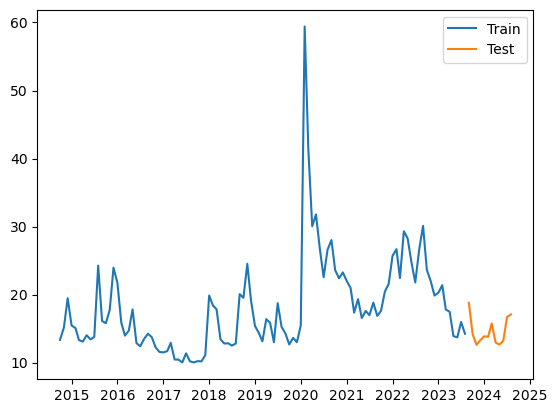

In [111]:
# Plot test and train data 
plt.plot(y_train_full, label='Train')
plt.plot(y_test_full, label='Test')
plt.legend()
plt.show()


In [112]:
all_feature_names = list(X_train_full.columns)
best_features = ['VIX']
best_rmse = float('inf')
remaining_features = all_feature_names.copy()

In [113]:
# Algorithm to determine feature combination that gives the best RMSE
while len(remaining_features) > 0:
    for feature in remaining_features:
        current_features = best_features.copy()
        current_features.append(feature)
        X_train, X_opt, y_train, y_opt = train_test_split(X_train_full[current_features], y_train_full, test_size=0.111111, shuffle=False)
        model = RandomForestRegressor(n_estimators=500, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_opt)
        rmse = root_mean_squared_error(y_opt, y_pred)
        if rmse < best_rmse:
            best_rmse = rmse
            best_features = current_features
    remaining_features.remove(feature)
print(best_features)
print(best_rmse)

['VIX', 'Unemployment Rate', 'Three Month T Bill Rate', '10-Year Treasury Constant Maturity Rate', 'Fed Rate', 'BBB Rate', 'Spot Crude Oil Price', 'NASDAQ Low', 'GOLD Volume', 'VIX', 'DJI High Minus Low', 'GOLD High Minus Low', 'OIL High Minus Low', 'SP500 High', 'FTSE Volume', 'NIKKEI Volume', 'GOLD Volume']
2.595057271352603


In [ ]:
X_train, X_opt, y_train, y_opt = train_test_split(X_train_full[best_features], y_train_full, test_size=0.111111, shuffle=False)

: 

In [ ]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor and GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, 
                           scoring='neg_root_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract the best model and parameters
best_rf = grid_search.best_estimator_
optimized_params = grid_search.best_params_

# Make predictions and calculate performance metrics
y_pred = best_rf.predict(X_opt)
rmse = root_mean_squared_error(y_opt, y_pred)
mae = mean_absolute_error(y_opt, y_pred)
r2 = r2_score(y_opt, y_pred)

print("Optimized Parameters:", optimized_params)
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

Optimized Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 200}
RMSE: 3.8813, MAE: 3.2979, R²: 0.2801


: 

In [ ]:
X = X_train_full
y = y_train_full

: 

In [ ]:
rf_model = RandomForestRegressor(n_estimators=optimized_params['n_estimators'], bootstrap=optimized_params['bootstrap'], max_depth=optimized_params['max_depth'], min_samples_split=optimized_params['min_samples_split'], min_samples_leaf=optimized_params['min_samples_leaf'], random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(max_depth=10, min_samples_split=20, n_estimators=200,
                      random_state=42)

: 

In [ ]:
y_pred = rf_model.predict(X_test_full[best_features])
# Calculate RMSE
rmse = root_mean_squared_error(y_test_full, y_pred)
# Calculate MAPE
mape = np.mean(np.abs((y_test_full - y_pred) / y_test_full)) * 100
# Calculate R²
r2 = r2_score(y_test_full, y_pred)
# Calculate Directional Accuracy
directional_accuracy = np.mean(np.sign(y_test_full.diff().dropna()) == np.sign(pd.Series(y_pred, index=y_test_full.index).diff().dropna())) * 100

print(f"RMSE: {rmse:.4f}, MAPE: {mape:.4f}%, R²: {r2:.4f}, Directional Accuracy: {directional_accuracy:.4f}%")

RMSE: 3.7141, MAPE: 22.9479%, R²: -2.6785, Directional Accuracy: 36.3636%


: 

In [ ]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

: 

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

: 

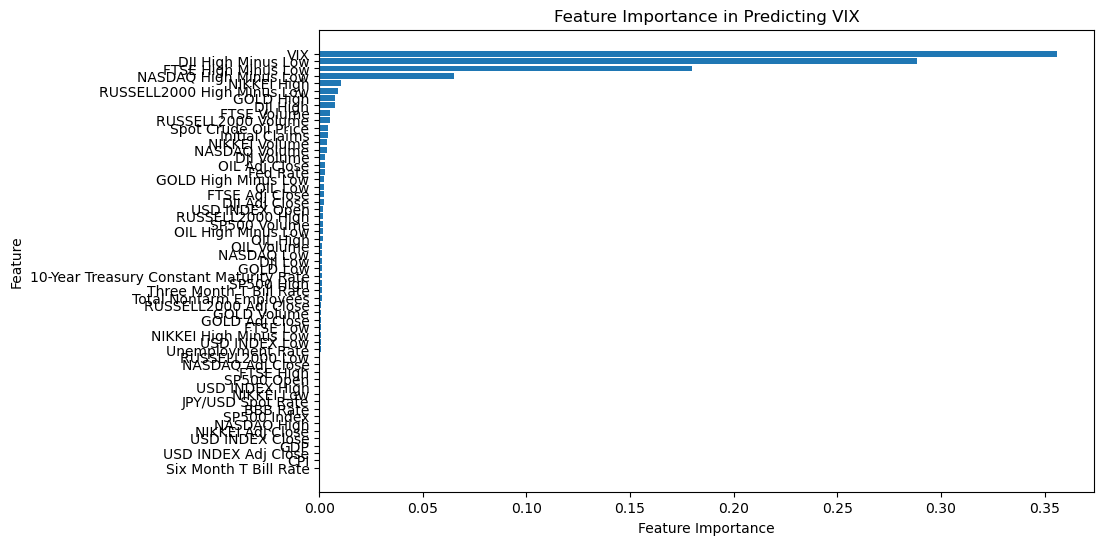

: 

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting VIX')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Add dates back to predictions
y_pred_df = pd.DataFrame(y_pred, index=X_test_full.index, columns=['Next Month VIX Prediction'])
y_test_df = pd.DataFrame(y_test_full, index=X_test_full.index, columns=['Next Month VIX'])

: 

In [ ]:
y_pred_df

,Next Month VIX Prediction
Date,
2023-09-01,16.000466
2023-10-01,17.033728
2023-11-01,20.418338
2023-12-01,15.502994
2024-01-01,15.866717
2024-02-01,15.905622
2024-03-01,15.783702
2024-04-01,17.928807
2024-05-01,17.780007


: 

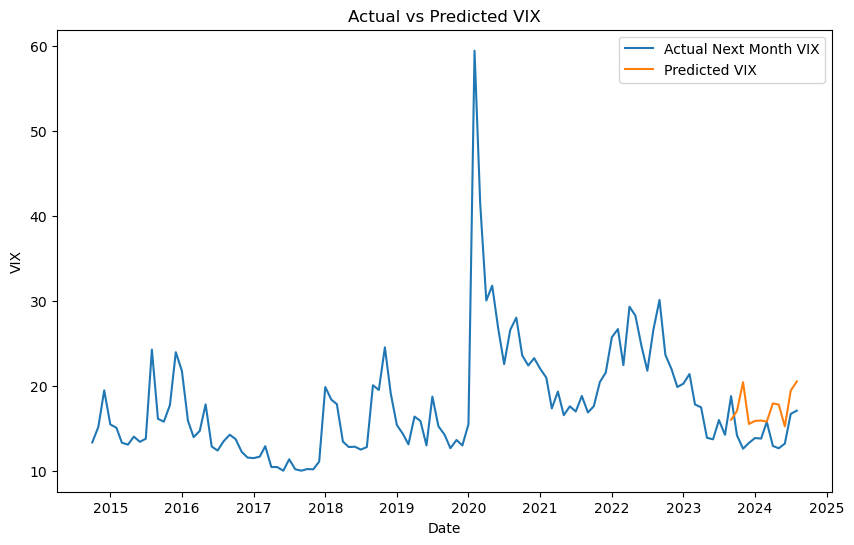

: 

In [ ]:
# Plot the actual VIX for the entire time series and the predicted VIX for the test set
plt.figure(figsize=(10, 6))
plt.title('Actual vs Predicted VIX')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.plot(y_entire, label='Actual Next Month VIX')
plt.plot(y_pred_df.index, y_pred_df['Next Month VIX Prediction'], label='Predicted VIX')
plt.legend()
plt.show()



In [ ]:
# Combine Data Frame of Predictions and Actual VIX
combined = pd.concat([y_test_df, y_pred_df], axis=1)
combined

,Next Month VIX,Next Month VIX Prediction
Date,,
2023-09-01,18.775,16.000466
2023-10-01,14.165,17.033728
2023-11-01,12.595,20.418338
2023-12-01,13.280,15.502994
2024-01-01,13.850,15.866717
2024-02-01,13.785,15.905622
2024-03-01,15.745,15.783702
2024-04-01,12.920,17.928807
2024-05-01,12.645,17.780007


: 

In [ ]:
# Predict VIX for the entire time series
y_pred_full = rf_model.predict(data_clean[best_features])
y_pred_full_df = pd.DataFrame(y_pred_full, index=data_clean.index, columns=['Next Month VIX Prediction'])

: 

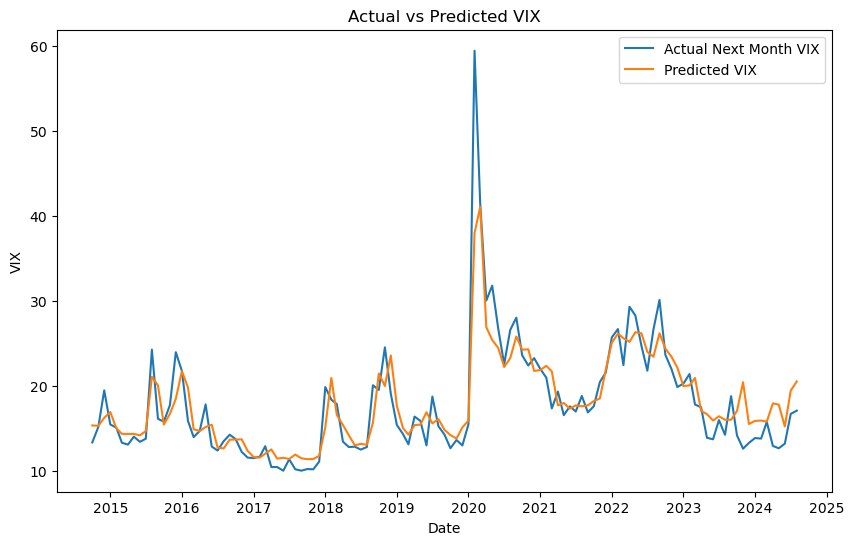

: 

In [ ]:
# Plot the actual VIX for the entire time series and the predicted VIX for the entire series
plt.figure(figsize=(10, 6))
plt.title('Actual vs Predicted VIX')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.plot(y_entire, label='Actual Next Month VIX')
plt.plot(y_pred_full_df.index, y_pred_full_df['Next Month VIX Prediction'], label='Predicted VIX')
plt.legend()
plt.show()
